<a href="https://colab.research.google.com/github/lit2020/class-deep-learning/blob/main/%5BDL%5D%20Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import sklearn

!python --version
print(torch.__version__)
print(sklearn.__version__)

Python 3.10.12
2.2.1+cu121
1.2.2


In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# california housing dataset docs: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
from sklearn.datasets import fetch_california_housing


In [51]:
housing = fetch_california_housing(as_frame=True)
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [52]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [54]:
x_data = housing.data
y_data = housing.target

# 20640 instances, 8 features
print(x_data.shape)
# 20640 target values
print(y_data.shape)

(20640, 8)
(20640,)


![linear_layer.PNG](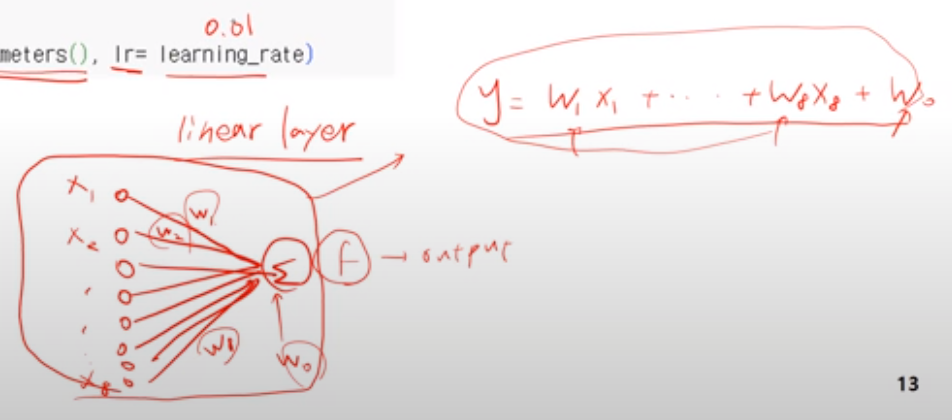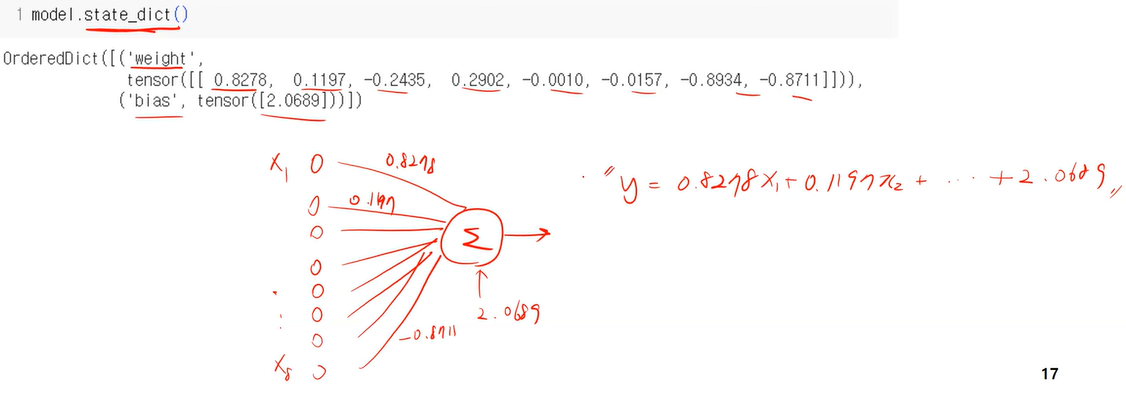)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [80]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_tensor = torch.FloatTensor(x_train_scaled)

# ERROR : could not determine the shape of object type 'Series'
# '.values' needed
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(x_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

In [81]:
# features tensor와 target tensor를 묶어 데이터셋 생성
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
# drop_last = True : batch_size단위로 데이터셋을 자르고 마지막 남은 자투리는 버림
dataloader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)

In [82]:
# 100개씩 사용해서 업데이트 (SGD)
# 모두 완료하면 1 epoch
for batch_idx, (x_batch, y_batch) in enumerate(dataloader):
  if(batch_idx % 20 == 0):
    print(batch_idx)
    print(x_batch.shape)
    print(y_batch.shape)
print("That was 1st epoch")

0
torch.Size([100, 8])
torch.Size([100])
20
torch.Size([100, 8])
torch.Size([100])
40
torch.Size([100, 8])
torch.Size([100])
60
torch.Size([100, 8])
torch.Size([100])
80
torch.Size([100, 8])
torch.Size([100])
100
torch.Size([100, 8])
torch.Size([100])
120
torch.Size([100, 8])
torch.Size([100])
140
torch.Size([100, 8])
torch.Size([100])
160
torch.Size([100, 8])
torch.Size([100])
That was 1st epoch


In [59]:
# Parameters
input_size = 8 # n_features
output_size = 1
learning_rate = 0.01 # eta for SGD
n_epochs = 100 # n_epoch

In [83]:
# generate model
model = nn.Linear(input_size, output_size)

# Loss function
criterion = nn.MSELoss()
# optimization method
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [84]:
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):
  for idx, (x_batch, y_batch) in enumerate(dataloader):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_batch)
    y_pred = y_pred.reshape(-1)
    # loss
    loss_train = criterion(y_pred, y_batch)
    # back propagation : calculate gradient
    loss_train.backward()
    # update weight
    optimizer.step()

    # loss for test data
    model.eval()
    y_test_pred = model(x_test_tensor)
    y_test_pred = y_test_pred.reshape(-1)
    loss_test = criterion(y_test_pred, y_test_tensor)

  # loss for last batch
  train_loss.append(loss_train.item())
  test_loss.append(loss_test.item())
  # per every epoch
  if epoch % 10 == 0:
    print("epoch : {}, Loss_train:{:.2f}, Loss_test{:.2f}".format(epoch, train_loss[-1], test_loss[-1]))

epoch : 0, Loss_train:0.67, Loss_test0.64
epoch : 10, Loss_train:0.62, Loss_test0.60
epoch : 20, Loss_train:0.50, Loss_test0.53
epoch : 30, Loss_train:0.39, Loss_test0.55
epoch : 40, Loss_train:0.54, Loss_test0.54
epoch : 50, Loss_train:0.46, Loss_test0.53
epoch : 60, Loss_train:0.39, Loss_test0.54
epoch : 70, Loss_train:0.33, Loss_test0.53
epoch : 80, Loss_train:0.42, Loss_test0.53
epoch : 90, Loss_train:0.47, Loss_test0.53
epoch : 100, Loss_train:0.61, Loss_test0.53


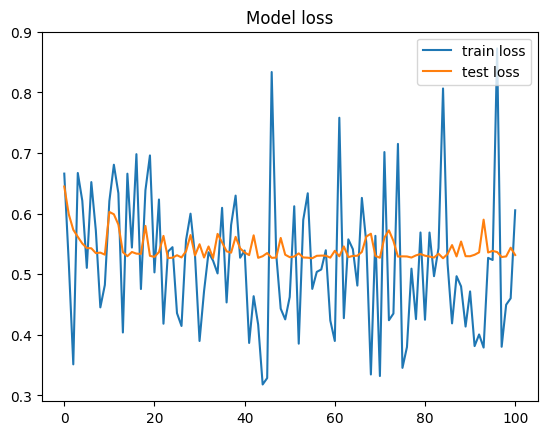

In [85]:
plt.figure()
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title('Model loss')
plt.legend(loc = 'upper right')
plt.show()

In [90]:
# weight, bias of trained model
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.8167,  0.1175, -0.2428,  0.2762, -0.0060, -0.0466, -0.8749, -0.8517]])),
             ('bias', tensor([2.0624]))])